In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Class 2 HW

In [11]:
# read data
file_location = "/Users/yujieliu/Desktop/BITTIGER/class 4/"
file_name = "BA501_python_data.csv"
my_data = pd.read_csv(file_location + file_name)



In [60]:
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5.813140e+18,16.138855,5.006730e+18,ANDROID_APPS
1,US,20170403,12624549,1.633310e+19,9.990000,5.938690e+18,ANDROID_APPS
2,JP,20170404,12624548,1.122710e+19,19.887087,1.762370e+19,ANDROID_APPS
3,US,20170403,12624548,1.192730e+19,19.990000,1.804280e+19,ANDROID_APPS
4,JP,20170403,12624549,1.164470e+19,88.220093,4.325100e+18,ANDROID_APPS


In [12]:
# deal with date format
my_data.date = pd.to_datetime(my_data.date, format='%Y%m%d')
my_data.date.head()
my_data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5.813140e+18,16.138855,5.006730e+18,ANDROID_APPS
1,US,2017-04-03,12624549,1.633310e+19,9.990000,5.938690e+18,ANDROID_APPS
2,JP,2017-04-04,12624548,1.122710e+19,19.887087,1.762370e+19,ANDROID_APPS
3,US,2017-04-03,12624548,1.192730e+19,19.990000,1.804280e+19,ANDROID_APPS
4,JP,2017-04-03,12624549,1.164470e+19,88.220093,4.325100e+18,ANDROID_APPS


In [62]:
# now, PrintCumulativeTimeSeries()
# a few function to return the cumulative sum instead of sum
def GetCumulativeSeries(my_data, my_id, country):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == country)]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    total_revenue = series[-1]
    return((series, total_revenue))

# same as before
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()
    
def PrintCumulativeTimeSeries(my_data, experiment_ids, country):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetCumulativeSeries(my_data, experiment_ids[0], country)[0]
    control_series = GetCumulativeSeries(my_data, experiment_ids[1], country)[0]
    treatment_revenue = GetCumulativeSeries(my_data, experiment_ids[0], country)[1]
    control_revenue = GetCumulativeSeries(my_data, experiment_ids[1], country)[1]
    
    print("Cumulative revenue impact: " + str(treatment_revenue/control_revenue*100-100) + "%")
    PlotSeries(treatment_series, control_series)
    


Cumulative revenue impact: -4.46580818945%


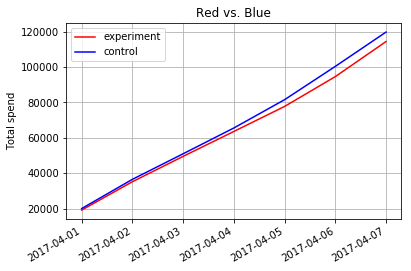

In [13]:
PrintCumulativeTimeSeries(my_data, [12624548,12624549], "US")

In [1]:
# now, PrintCumulativeTimeSeries()
# a few function to return the cumulative sum instead of sum
def GetCumulativeSeries(my_data, my_id, country):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == country)]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    total_revenue = series[-1]
    return((series, total_revenue))

# same as before
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()
    
def PrintCumulativeTimeSeries(my_data, experiment_ids, country):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetCumulativeSeries(my_data, experiment_ids[0], country)[0]
    control_series = GetCumulativeSeries(my_data, experiment_ids[1], country)[0]
    treatment_revenue = GetCumulativeSeries(my_data, experiment_ids[0], country)[1]
    control_revenue = GetCumulativeSeries(my_data, experiment_ids[1], country)[1]
    
    print("Cumulative revenue impact: " + str(treatment_revenue/control_revenue*100-100) + "%")
    PlotSeries(treatment_series, control_series)

Cumulative revenue impact: -4.46580818945%


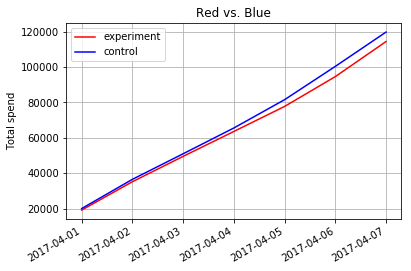

In [14]:
PrintCumulativeTimeSeries(my_data, [12624548,12624549], "US")

  class 1 HW1 how do you handle duplicate values in a dataset in python?

In [1]:
# if in a numpy array
import numpy as np
a = np.array([1,2,3,3,4,5])
print a

a_dedupe = np.unique(a)
print a_dedupe

[1 2 3 3 4 5]
[1 2 3 4 5]


In [2]:
# if a dataframe
import pandas as pd
b = pd.DataFrame([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,6]])
#b = np.array([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,6]])


# after checking on documentation, we know that...
b_dedupe = b.drop_duplicates()
print b_dedupe
print b

   0  1  2  3  4
0  1  2  3  4  5
2  1  2  3  4  6
   0  1  2  3  4
0  1  2  3  4  5
1  1  2  3  4  5
2  1  2  3  4  6


class 1 HW2 
You are given two tables - friend_request and request_accepted. Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, acceptor_id and requestor_id. How will you determine the overall acceptance rate of requests? 


In [27]:
import pandas as pd

friend_request = pd.DataFrame(
   {"requestor_id":[1001,1002,1003],
    "time":["2017-07-01","2017-07-02","2017-07-03"],
    "sent_to_id":[3001,3002,3003]}
)

request_accepted = pd.DataFrame(
   {"requestor_id":[1001,1003],
    "time":["2017-07-01","2017-07-04"],
    "acceptor_id":[3001,3003]}
)

print friend_request
print request_accepted

# sql
#select sum(if(t2.acceptor_id is null, 0, 1))/sum(1) as acceptance_rate, avg(time_diff(t2.time, t1.time)) as time_diff
#from friend_request t1
#left join request_accepted t2
#on t1.requestor_id=t2.requetor_id;

   requestor_id  sent_to_id        time
0          1001        3001  2017-07-01
1          1002        3002  2017-07-02
2          1003        3003  2017-07-03
   acceptor_id  requestor_id        time
0         3001          1001  2017-07-01
1         3003          1003  2017-07-04


In [28]:
a = pd.merge(friend_request,request_accepted,how="left",on="requestor_id")
len(a["acceptor_id"][a.acceptor_id > 0])/(len(a["acceptor_id"])*1.0)

0.6666666666666666

Q: sum(1) ?
   len(a["acceptor_id"][a.acceptor_id > 0])/(len(a["acceptor_id"])*1.0) ?
   as.legend()
   